# SLR: CO2 Emission Prediction

## Importing Required Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas
import pylab as pl
import numpy
%matplotlib inline

## Reading CSV File

In [40]:
readFile = pandas.read_csv("FuelConsumptionCo2.csv")

## Verifying CSV File Read

By default, if no parameters givem, `head()` will only display the first 5 rows.

In [4]:
readFile.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [53]:
readFile[(readFile['TRANSMISSION']=='AS5') | (readFile['TRANSMISSION']=='M6')]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,aqsa
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Z
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Z
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267,Z
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212,Z
10,2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2014,VOLKSWAGEN,GOLF WAGON TDI CLEAN DIESEL,STATION WAGON - SMALL,2.0,4,M6,D,7.9,5.6,6.9,41,186,0
1039,2014,VOLKSWAGEN,JETTA GLI,COMPACT,2.0,4,M6,Z,10.6,7.4,9.2,31,212,Z
1041,2014,VOLKSWAGEN,JETTA TDI CLEAN DIESEL,COMPACT,2.0,4,M6,D,7.9,5.6,6.9,41,186,0
1049,2014,VOLKSWAGEN,PASSAT TDI CLEAN DIESEL,MID-SIZE,2.0,4,M6,D,8.0,5.4,6.8,42,184,0


## Describing Dataset

i.e. return some valuable calculations about our data.

In [4]:
readFile.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Selecting Our Required Columns

Model year is clearly constant, so we can disregard it along with any object/string columns.

In [5]:
label = "CO2EMISSIONS"

y = readFile[label]
X = readFile.copy()
for column in readFile:
    if column == label or readFile[column].dtype == 'O' or column == "MODELYEAR":
        X = X.drop([column], axis=1)

X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


## Plotting to Visualise Linearity

Now, you can plot each column against the "Emissions" column to see the nature of their relationship.

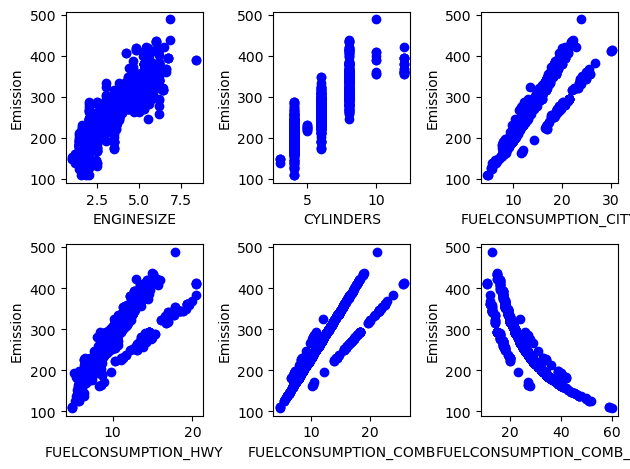

In [6]:
x = 1

for column in X:
    plt.subplot(2, 3, x)
    plt.scatter(X[column], y,  color='blue')
    plt.xlabel(column)
    plt.ylabel("Emission")

    x += 1

plt.tight_layout()
plt.show()

As you can see, `CO2EMISSIONS` and `FUELCONSUMPTION_COMB_MPG` do not have a linear relationship, so we will exclude that from our dataset as well.

In [7]:
X = X.drop("FUELCONSUMPTION_COMB_MPG", axis=1)

## Creating Test/Train Sets

Here, we are doing a few different things: first, we create the train-test sets, then we fit our model against the train-set, then we run it against the x-test-set to see what y-values it gives us, and finally we compared those values with the actual y-values in our test-set.

ENGINESIZE-CO2EMISSIONS slope: 38.992978724434046
ENGINESIZE-CO2EMISSIONS accurage score: 0.7615595731934374

CYLINDERS-CO2EMISSIONS slope: 29.478398786995303
CYLINDERS-CO2EMISSIONS accurage score: 0.7317140029783895

FUELCONSUMPTION_CITY-CO2EMISSIONS slope: 13.851796275287033
FUELCONSUMPTION_CITY-CO2EMISSIONS accurage score: 0.8184231533160797

FUELCONSUMPTION_HWY-CO2EMISSIONS slope: 19.463434590886155
FUELCONSUMPTION_HWY-CO2EMISSIONS accurage score: 0.7517607554334446

FUELCONSUMPTION_COMB-CO2EMISSIONS slope: 16.18090078119919
FUELCONSUMPTION_COMB-CO2EMISSIONS accurage score: 0.8071474868274242



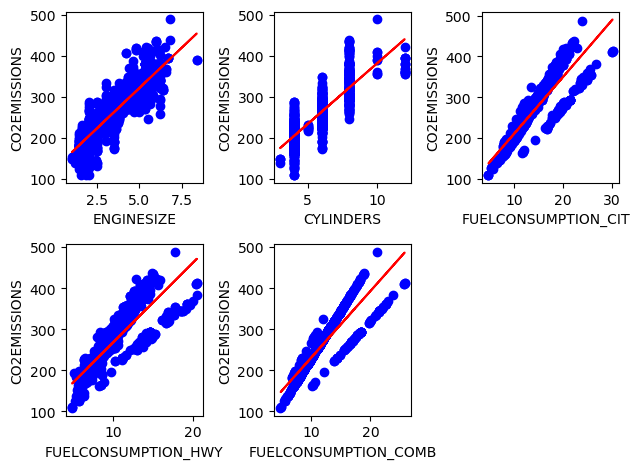

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = 1

for column in X:
    X_use = X[[column]]
    X_train, X_test, y_train, y_test = train_test_split(X_use, y, test_size = 0.2, random_state = 42)

    regr = LinearRegression()
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_test)

    print(column + "-CO2EMISSIONS slope:", regr.coef_[0])
    print(column + "-CO2EMISSIONS accurage score:", r2_score(y_test, y_pred))
    print()

    plt.subplot(2, 3, x)
    plt.scatter(X[column], y, color='blue')
    plt.plot(X_train, regr.coef_[0]*X_train + regr.intercept_, '-r')
    plt.xlabel(column)
    plt.ylabel("CO2EMISSIONS")

    x += 1

plt.tight_layout()
plt.show()

## Conclusion

`FUELCONSUMPTION_CITY` and `FUELCONSUMPTION_COMB` are good attributes to train our model against and predict `CO2EMISSIONS` values, as they clearly have the highest impact the `CO2EMISSIONS` (as observed by their higher R2 scores).